### 1. Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

### 2. Load and Explore Data

In [2]:
df = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv")

### 3. Data Cleaning

In [3]:
df.shape

(1048575, 16)

In [4]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [5]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2/20/2024 5:58,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2/25/2024 8:09,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,3/18/2024 3:42,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,3/16/2024 20:41,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,1/15/2024 5:08,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1048575 non-null  object 
 1   Customer ID         1048575 non-null  object 
 2   Transaction Amount  1048575 non-null  float64
 3   Transaction Date    1048575 non-null  object 
 4   Payment Method      1048575 non-null  object 
 5   Product Category    1048575 non-null  object 
 6   Quantity            1048575 non-null  int64  
 7   Customer Age        1048575 non-null  int64  
 8   Customer Location   1048575 non-null  object 
 9   Device Used         1048575 non-null  object 
 10  IP Address          1048575 non-null  object 
 11  Shipping Address    1048575 non-null  object 
 12  Billing Address     1048575 non-null  object 
 13  Is Fraudulent       1048575 non-null  int64  
 14  Account Age Days    1048575 non-null  int64  
 15  Transaction Hou

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [9]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"],errors ='coerce')

### 4. Feature Engineering

In [10]:
df['Transaction Month'] = df['Transaction Date'].dt.month
df['Transaction Hour'] = df['Transaction Date'].dt.hour
df['Transaction Day'] = df['Transaction Date'].dt.day
df['Transaction Weekday'] = df['Transaction Date'].dt.weekday

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Transaction ID       1048575 non-null  object        
 1   Customer ID          1048575 non-null  object        
 2   Transaction Amount   1048575 non-null  float64       
 3   Transaction Date     1048575 non-null  datetime64[ns]
 4   Payment Method       1048575 non-null  object        
 5   Product Category     1048575 non-null  object        
 6   Quantity             1048575 non-null  int64         
 7   Customer Age         1048575 non-null  int64         
 8   Customer Location    1048575 non-null  object        
 9   Device Used          1048575 non-null  object        
 10  IP Address           1048575 non-null  object        
 11  Shipping Address     1048575 non-null  object        
 12  Billing Address      1048575 non-null  object        
 1

In [12]:
df.shape

(1048575, 19)

In [13]:
df.head(2)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Day,Transaction Weekday
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:00,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,2,20,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:00,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,2,25,6


### 5. Exploratory Data Analysis (EDA)

In [14]:
df['Is Fraudulent'].value_counts(normalize=True) * 100

Is Fraudulent
0    94.991298
1     5.008702
Name: proportion, dtype: float64

In [15]:
# Count and calculate percentage
fraud_counts = df['Is Fraudulent'].value_counts().sort_index()
fraud_percent = (fraud_counts / fraud_counts.sum()) * 100
fraud_labels = [f'{p:.2f}%' for p in fraud_percent]
print("Fraud Counts",fraud_counts)
print("Fraud Percent",fraud_percent)
print("Fraud Label",fraud_labels)

Fraud Counts Is Fraudulent
0    996055
1     52520
Name: count, dtype: int64
Fraud Percent Is Fraudulent
0    94.991298
1     5.008702
Name: count, dtype: float64
Fraud Label ['94.99%', '5.01%']


### 6. Visuals and Insights

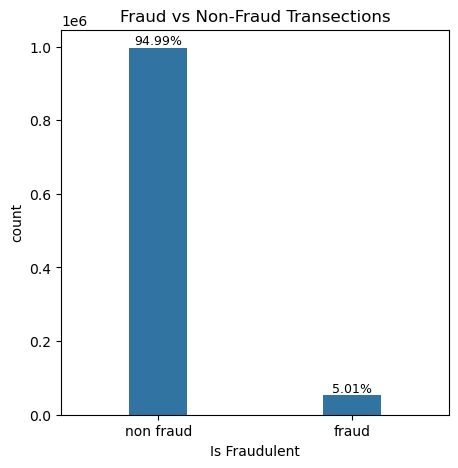

In [16]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df ,x = 'Is Fraudulent',width = 0.3)
plt.title('Fraud vs Non-Fraud Transections')

for bar, label in zip(ax.patches, fraud_labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1000, label,
            ha='center', va='bottom', fontsize=9, color='black')

    
plt.xticks([0,1],["non fraud","fraud"])
plt.show()

## Insight

### Graph shows that only a small portion (5%) of transactions are fraudulent, which indicates class imbalance in the dataset. This was handled during model training using class weights

In [17]:
df.groupby("Payment Method")["Is Fraudulent"].sum()

Payment Method
PayPal           13023
bank transfer    13207
credit card      13038
debit card       13252
Name: Is Fraudulent, dtype: int64

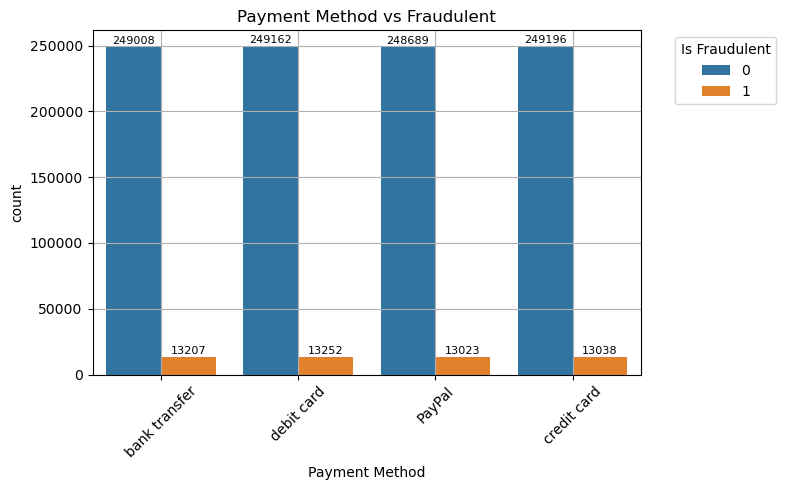

In [18]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = df ,x = 'Payment Method',hue = 'Is Fraudulent')
plt.title('Payment Method vs Fraudulent')
plt.xticks(rotation = 45)

plt.legend(title='Is Fraudulent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1, fontsize=8, color='black')
plt.savefig('payment_vs_fraud.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

## Insight:
### Debit Card and Bank Transfer methods are more associated with fraudulent transactions.

In [19]:
# Find indexes where Customer Age <= 0 and # Drop those rows

invalid_age = df[df["Customer Age"] <= 0 ].index
df.drop(index = invalid_age,inplace = True)

In [20]:
# Check after cleaning

print("Invalid ages left:", df[df["Customer Age"] <= 0].shape[0])

Invalid ages left: 0


In [21]:
df.to_csv('cleaned_fraud_data.csv', index=False)

In [22]:
df[df['Is Fraudulent'] == 0]['Customer Age'].describe()

count    995691.000000
mean         34.532694
std           9.977257
min           1.000000
25%          28.000000
50%          35.000000
75%          41.000000
max          86.000000
Name: Customer Age, dtype: float64

In [23]:
df[df['Is Fraudulent'] == 1]['Customer Age'].describe()

count    52502.000000
mean        34.534437
std         10.021587
min          1.000000
25%         28.000000
50%         35.000000
75%         41.000000
max         77.000000
Name: Customer Age, dtype: float64

In [24]:
# Fraudulent transactions
fraud_age_range = df[df['Is Fraudulent'] == 1]['Customer Age'].agg(['min', 'max'])
print("Fraudulent Age Range:", fraud_age_range)

# Non-fraudulent transactions
nonfraud_age_range = df[df['Is Fraudulent'] == 0]['Customer Age'].agg(['min', 'max'])
print("Non-Fraudulent Age Range:", nonfraud_age_range)


Fraudulent Age Range: min     1
max    77
Name: Customer Age, dtype: int64
Non-Fraudulent Age Range: min     1
max    86
Name: Customer Age, dtype: int64


## Insight:
### Removed invalid age values (age <= 0) for data consistency.

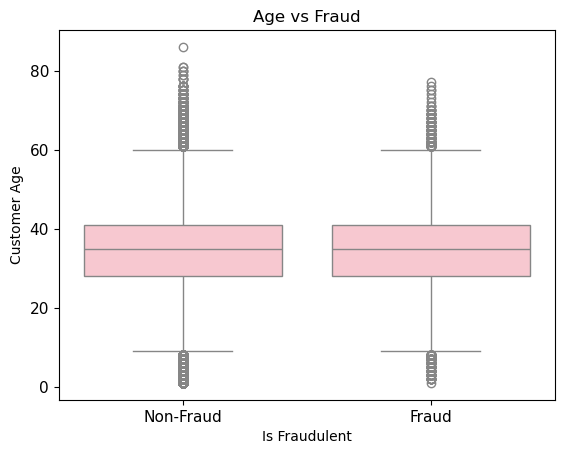

In [25]:
# Customer Age vs fraud Analysis
sns.boxplot(data=df, x='Is Fraudulent', y='Customer Age',color = 'pink')
plt.title("Age vs Fraud")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], fontsize=11)
plt.yticks(fontsize=11)
plt.show()

## Insight:
### Fraudulent customers are mostly between 25–41 years of age.


In [26]:
df.groupby("Product Category")["Is Fraudulent"].sum()

Product Category
clothing           10456
electronics        10391
health & beauty    10529
home & garden      10555
toys & games       10571
Name: Is Fraudulent, dtype: int64

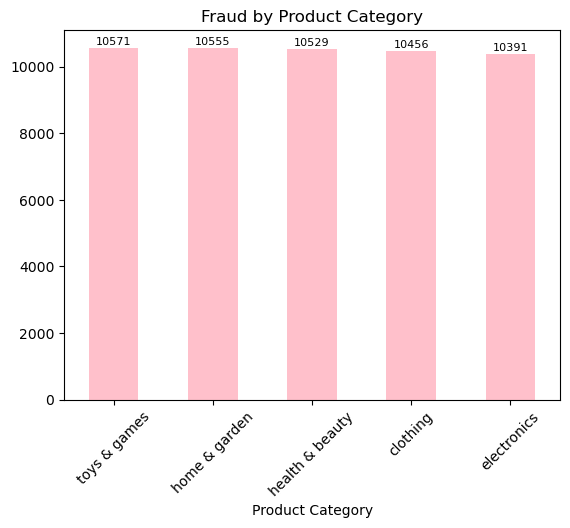

In [27]:
# Product Category Analysis
fraud_df = df[df['Is Fraudulent'] == 1]

ax = fraud_df['Product Category'].value_counts().plot(kind='bar', title='Fraud by Product Category',color = 'pink')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1, fontsize=8, color='black')
plt.tight_layout
plt.show()


## Insight:
### Some specific product categories show higher fraud occurrence.

In [28]:
# Fraud % by Payment Method
fraud_rate = pd.crosstab(df['Payment Method'], df['Is Fraudulent'], normalize='index') * 100
fraud_rate.columns = ['Not Fraud', 'Fraudulent']
fraud_rate = fraud_rate.sort_values(by='Fraudulent', ascending=False)
fraud_rate

,Not Fraud,Fraudulent
Payment Method,,
debit card,94.950538,5.049462
bank transfer,94.964158,5.035842
PayPal,95.023240,4.976760
credit card,95.026914,4.973086


C:\Users\Kajal Prajapati\AppData\Local\Temp\ipykernel_5328\1377435252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fraud_rate, y='Payment Method', x='Fraudulent', palette='Blues_r',width = 0.5)


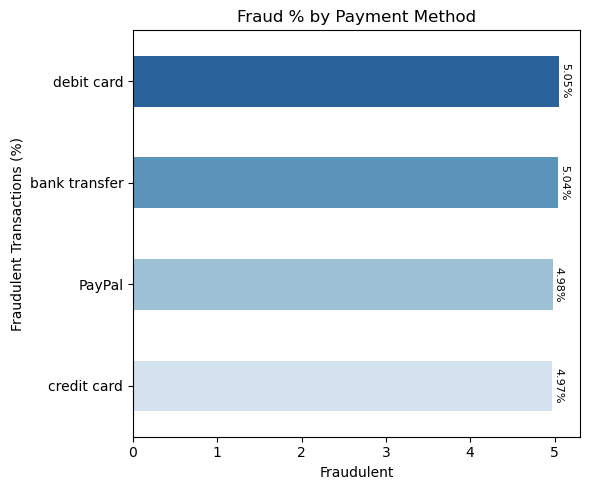

In [29]:
plt.figure(figsize = (6,5))
ax = sns.barplot(data=fraud_rate, y='Payment Method', x='Fraudulent', palette='Blues_r',width = 0.5)

for container in ax.containers:
    ax.bar_label(container, label_type='edge',fmt='%.2f%%', padding=1, fontsize=8, color='black',rotation = 270)

plt.title("Fraud % by Payment Method")
plt.ylabel("Fraudulent Transactions (%)")
plt.xticks()
plt.tight_layout()
plt.show()

## Insight:
### payment methods have up to 4–5% fraud rate, making them riskier

In [30]:
df.groupby("Device Used")["Is Fraudulent"].sum()

Device Used
desktop    17462
mobile     17670
tablet     17370
Name: Is Fraudulent, dtype: int64

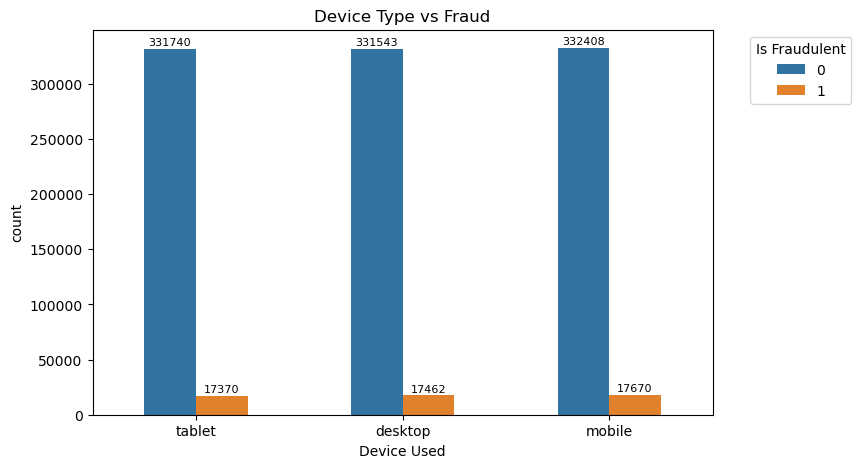

In [31]:
# Device Used Analysis

plt.figure(figsize = (8,5))
ax = sns.countplot(data=df, x='Device Used', hue='Is Fraudulent',width = 0.5)
plt.legend(title='Is Fraudulent', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1, fontsize=8, color='black')
plt.title("Device Type vs Fraud")
plt.show()


## Insight:
### Mobile devices are more associated with fraudulent activity.

C:\Users\Kajal Prajapati\AppData\Local\Temp\ipykernel_5328\1756717284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_location.values, y=fraud_location.index, palette='Reds_r',width = 0.6)


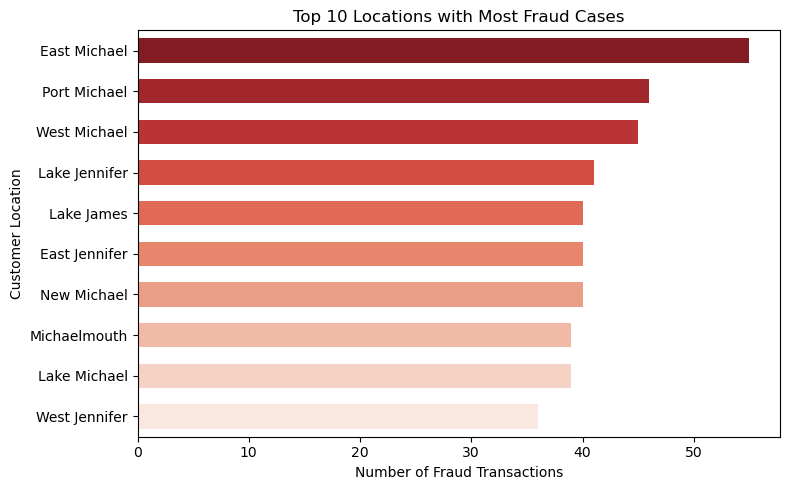

In [32]:
# Fraud-only dataset
fraud_df = df[df['Is Fraudulent'] == 1]

# Fraud count by location
fraud_location = fraud_df['Customer Location'].value_counts().head(10)

# Top 10 Fraud Locations
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_location.values, y=fraud_location.index, palette='Reds_r',width = 0.6)

plt.title('Top 10 Locations with Most Fraud Cases')
plt.xlabel('Number of Fraud Transactions')
plt.ylabel('Customer Location')
plt.tight_layout()
plt.show()

## Insight:
### Fraud cases are mostly concentrated in specific customer locations.

### 7. Model Building

In [33]:
# Prepare for modeling
df_model = df.copy()

# Encode Device and Payment Method columns
df_model = pd.get_dummies(df_model, columns=['Device Used', 'Payment Method'], drop_first=True)


In [34]:
X = df_model.drop('Is Fraudulent', axis=1)  # features
y = df_model['Is Fraudulent']               # target
X.head(2)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Product Category,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,...,Account Age Days,Transaction Hour,Transaction Month,Transaction Day,Transaction Weekday,Device Used_mobile,Device Used_tablet,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:00,electronics,1,17,Amandaborough,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,...,30,5,2,20,1,False,True,True,False,False
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:00,electronics,2,40,East Timothy,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063",...,72,8,2,25,6,False,False,False,False,True


In [35]:
X = df_model.drop(columns=[
    'Is Fraudulent', 'Customer ID', 'Transaction Date','Transaction ID',
    'Product Category', 'Customer Location', 'IP Address',
    'Shipping Address','Billing Address'
])
X.head(1)

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Transaction Month,Transaction Day,Transaction Weekday,Device Used_mobile,Device Used_tablet,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card
0,58.09,1,17,30,5,2,20,1,False,True,True,False,False


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
# Train model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### 8. Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188444  10725]
 [  8028   2442]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95    199169
           1       0.19      0.23      0.21     10470

    accuracy                           0.91    209639
   macro avg       0.57      0.59      0.58    209639
weighted avg       0.92      0.91      0.92    209639



In [40]:
y.value_counts() # Check Class Imbalance

Is Fraudulent
0    995691
1     52502
Name: count, dtype: int64

In [41]:
# Improved model with class weights

model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [42]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    199169
           1       0.20      0.20      0.20     10470

    accuracy                           0.92    209639
   macro avg       0.58      0.58      0.58    209639
weighted avg       0.92      0.92      0.92    209639



### Insight
Initially, my model performed well only on non-fraud cases, but struggled with fraud detection due to class imbalance (only 5% fraud). I applied class weighting, which slightly improved fraud detection while keeping overall performance stable.

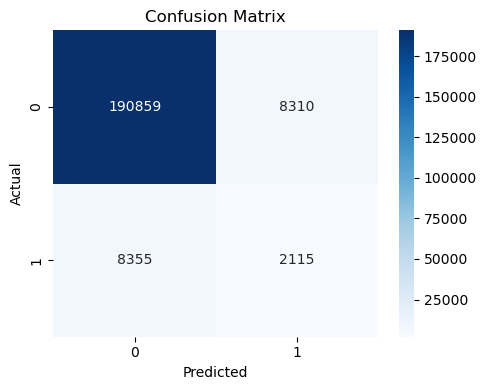

In [43]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Insight:
### Balanced class model improves recall of fraud class (1), which is important in fraud detection.

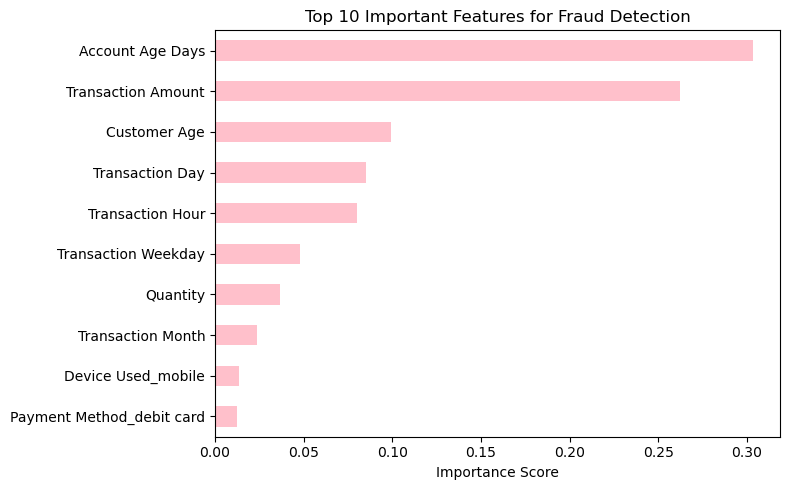

In [44]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Top 10 most important features
plt.figure(figsize=(8,5))
feature_importance.nlargest(10).plot(kind='barh', color='pink')
plt.title("Top 10 Important Features for Fraud Detection")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # highest feature
plt.tight_layout()
plt.show()


## Insight:
### Features like 'Account Age Days', 'Transaction Amount', and 'Customer Age' are key fraud indicators.

# 9. Conclusion
# ---------------------------------------------
- This project involved end-to-end fraud detection: starting from raw data cleaning,
- feature engineering, visual EDA, and building a predictive model.
- The insights can help businesses identify fraud-prone areas, customers, and payment methods
- to take preventive actions.